In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import KFold

In [2]:
data_ty=pd.read_csv('Tensile stress strength at yield v2(0.3).csv')
def get_Morgan_fingerprint_frequency(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,3,nBits=2048,bitInfo=info)
        key=[key for key in info.keys()]
        frq=[len(value) for value in info.values()]
        new_info={key: value for key, value in zip(key, frq)}
        mff=[0] * len(list(fp))
        for key, value in new_info.items():
            mff[key] = value
    except:
        mff=None
    return mff
data_ty['morgan_fp_with_freq'] = data_ty['smiles'].apply(get_Morgan_fingerprint_frequency)

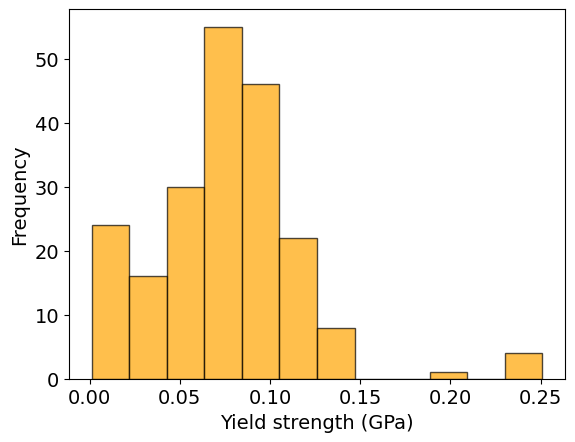

In [3]:
import matplotlib.pyplot as plt

plt.hist(data_ty['property_value_median'], bins=12, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Yield strength (GPa)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#plt.title('Histogram of Yield Strength')
#plt.xlim(0, 0.25)
#plt.show()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.savefig('yield_strength_histogram_v0403.jpg',dpi=400)

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
### Grid Search for Hyperparameter Tuning
import itertools
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    data_ty['morgan_fp_with_freq'].tolist(),
    data_ty['property_value_median'].tolist(),
    test_size=0.1,
    random_state=10
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,6, 12],
    'min_samples_split': [2, 7, 12],
    'min_samples_leaf': [1, 5, 9]
}


keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

best_score = np.inf
best_params = None

for params in param_combinations:
    rf = RandomForestRegressor(random_state=42, **params)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    print(f"Params: {params}")
    print(f"R2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    

    if mae < best_score:
        best_score = mae
        best_mse = mse
        best_rmse = rmse
        best_mae = mae
        best_r2= r2
        best_params = params

print("Best parameters found:")
print(best_params)
print(f"Best MSE: {best_mse:.4f}, RMSE: {best_rmse:.4f}, MAE: {best_mae:.4f},Best R2 score: {best_r2:.4f}")


Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
R2: 0.8410, MSE: 0.0004, RMSE: 0.0198, MAE: 0.0124
Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 5}
R2: 0.7433, MSE: 0.0006, RMSE: 0.0251, MAE: 0.0149
Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 9}
R2: 0.6788, MSE: 0.0008, RMSE: 0.0281, MAE: 0.0163
Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 1}
R2: 0.8479, MSE: 0.0004, RMSE: 0.0193, MAE: 0.0128
Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 5}
R2: 0.7433, MSE: 0.0006, RMSE: 0.0251, MAE: 0.0149
Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 9}
R2: 0.6788, MSE: 0.0008, RMSE: 0.0281, MAE: 0.0163
Params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 1}
R2: 0.8382, MSE: 0.00

In [6]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp_with_freq'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mff_rf_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print('MSE:', mff_rf_mse)
print('R2 score:', r2)
print('MAE:',mae)
print('RMSE:',rmse)
print('Related error:',mae/np.mean(y_test))

MSE: 0.000391197357486477
R2 score: 0.8409751461542392
MAE: 0.012401124285714287
RMSE: 0.019778709702265133
Related error: 0.16733853680728514


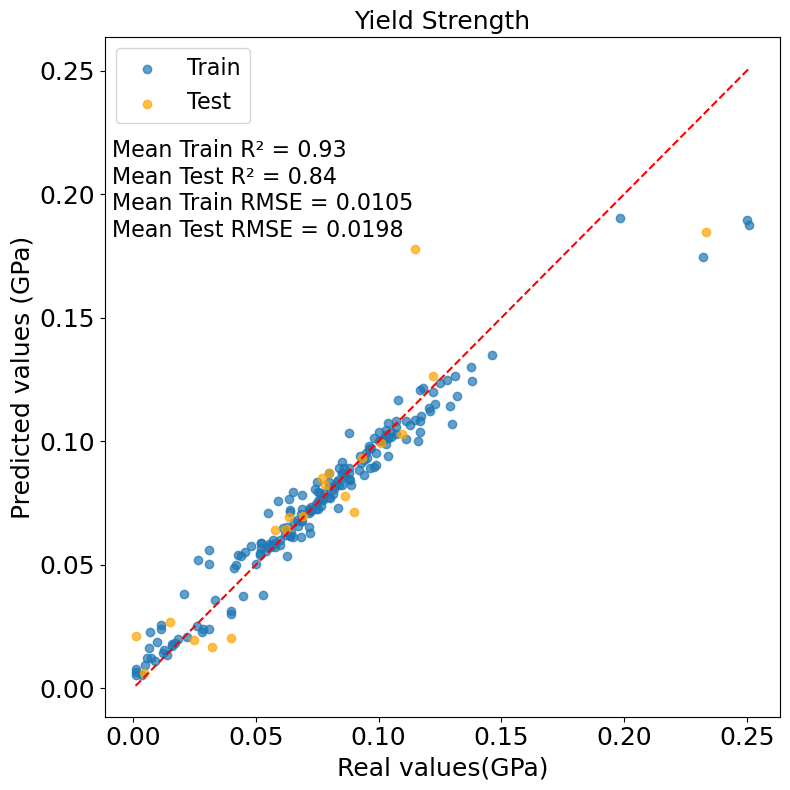

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in `data_ty`
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp_with_freq'].tolist(), 
                                                    data_ty['property_value_median'].tolist(), 
                                                    test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

rf.fit(X_train, y_train)

# Predictions and Metrics for Training Data
y_train_pred = rf.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Predictions and Metrics for Testing Data
y_test_pred = rf.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.7, color='orange')
plt.plot([min(y_train + y_test), max(y_train + y_test)], 
         [min(y_train + y_test), max(y_train + y_test)], 
         color='red', linestyle='--')


plt.text(0.01, 0.85, 
         f"Mean Train R² = {train_r2:.2f}\n"
         f"Mean Test R² = {test_r2:.2f}\n"
         f"Mean Train RMSE = {train_rmse:.4f}\n"
         f"Mean Test RMSE = {test_rmse:.4f}\n", 
         transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.tick_params(axis='both', which='major', labelsize=18) 
plt.xlabel("Real values(GPa)", fontsize=18)
plt.ylabel("Predicted values (GPa)", fontsize=18)
plt.title("Yield Strength", fontsize=18)
plt.legend(fontsize=16)
#plt.grid(alpha=0.3)
plt.tight_layout()
#plt.show()
plt.savefig('pair_plot_v0403.jpg',dpi=400)


In [36]:
import random
import numpy as np
num_iterations = 100
mse_list, r2_list, mae_list, rmse_list = [], [], [], []

for i in range(num_iterations):
    y_train_random = y_train.copy()
    random.shuffle(y_train_random)  # randomly shuffle the y_train values
    rf_random =  RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)
    rf_random.fit(X_train, y_train_random)
    
    y_pred_random = rf_random.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred_random))
    r2_list.append(r2_score(y_test, y_pred_random))
    mae_list.append(mean_absolute_error(y_test, y_pred_random))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_random)))

# Calculate mean and std for each metric
mse_mean, mse_std = np.mean(mse_list), np.std(mse_list)
r2_mean, r2_std = np.mean(r2_list), np.std(r2_list)
mae_mean, mae_std = np.mean(mae_list), np.std(mae_list)
rmse_mean, rmse_std = np.mean(np.sqrt(mse_list)), np.std(np.sqrt(mse_list))

print('Y-random Validation Results (100 iterations):')
print(f'MSE (mean ± std): {mse_mean:.4f} ± {mse_std:.4f}')
print(f'R2 score (mean ± std): {r2_mean:.4f} ± {r2_std:.4f}')
print(f'MAE (mean ± std): {mae_mean:.4f} ± {mae_std:.4f}')
print(f'RMSE (mean ± std): {rmse_mean:.4f} ± {rmse_std:.4f}')

Y-random Validation Results (100 iterations):
MSE (mean ± std): 0.0028 ± 0.0006
R2 score (mean ± std): -0.1570 ± 0.2297
MAE (mean ± std): 0.0389 ± 0.0045
RMSE (mean ± std): 0.0531 ± 0.0052


In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the model
rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

# Prepare the data
X = data_ty['morgan_fp_with_freq'].tolist()
y = data_ty['property_value_median'].tolist()

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=2759)

# Perform cross-validation
mse_scores = []
r2_scores = []
mae_scores = []
rmse_scores = []
mean_y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = [X[i] for i in train_index], [X[i] for i in test_index]
    y_train, y_test = [y[i] for i in train_index], [y[i] for i in test_index]

    # Train the model
    rf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mean_y_test_list.append(np.mean(y_test))

# Calculate mean and standard deviation of metrics
mse_mean, mse_std = np.mean(mse_scores), np.std(mse_scores)
r2_mean, r2_std = np.mean(r2_scores), np.std(r2_scores)
mae_mean, mae_std = np.mean(mae_scores), np.std(mae_scores)
rmse_mean, rmse_std = np.mean(rmse_scores), np.std(rmse_scores)
#all_y_test_mean, all_y_test_std = np.mean(mean_y_test_list), np.std(mean_y_test_list)


# Print results
print(f'10-Fold Cross-Validation Results:')
print(f'MSE: {mse_mean:.4f} ± {mse_std:.4f}')
print(f'R2 score: {r2_mean:.4f} ± {r2_std:.4f}')
print(f'MAE: {mae_mean:.4f} ± {mae_std:.4f}')
print(f'RMSE: {rmse_mean:.4f} ± {rmse_std:.4f}')
#print(f'Mean related error:{mae_mean/all_y_test_mean:.4f}')

10-Fold Cross-Validation Results:
MSE: 0.0007 ± 0.0010
R2 score: 0.6923 ± 0.1558
MAE: 0.0150 ± 0.0067
RMSE: 0.0220 ± 0.0140


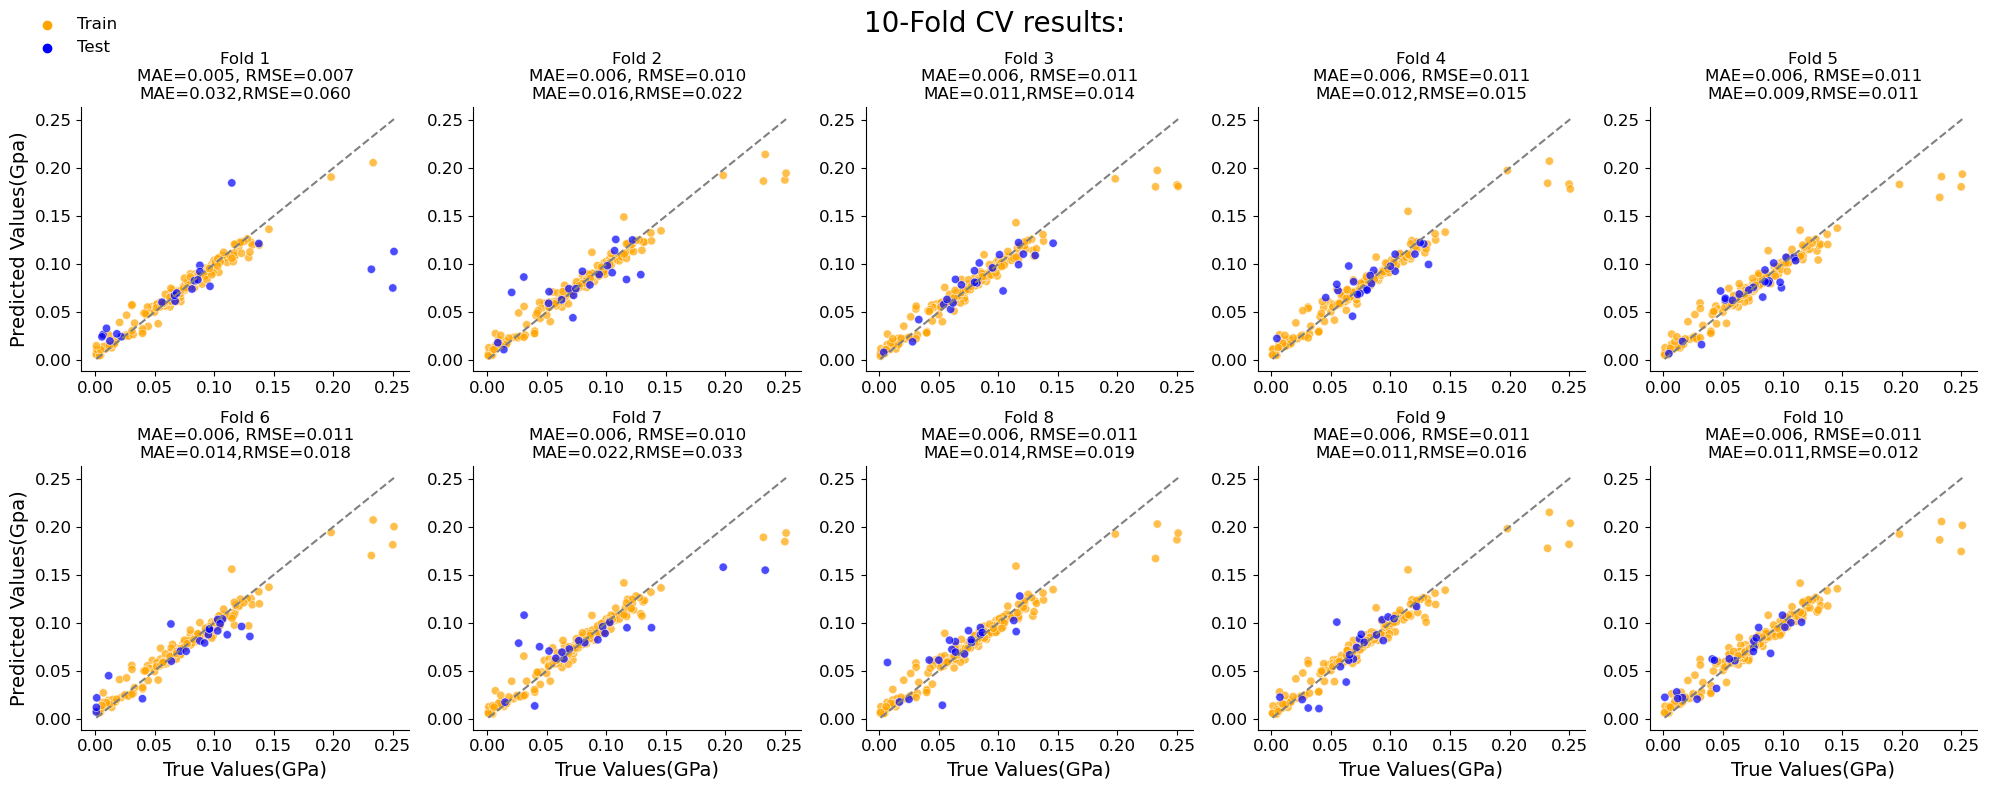

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

X = data_ty['morgan_fp_with_freq'].tolist()
y = data_ty['property_value_median'].tolist()

kf = KFold(n_splits=10, shuffle=True, random_state=2759)

mse_scores, r2_scores, mae_scores = [], [], []
results = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = [X[i] for i in train_index], [X[i] for i in test_index]
    y_train, y_test = [y[i] for i in train_index], [y[i] for i in test_index]

    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    mse_scores.append(mean_squared_error(y_test, y_test_pred))
    r2_scores.append(r2_test)
    mae_scores.append(mae_test)

    fold_label = (
        f"Fold {fold}\n"
        f"MAE={mae_train:.3f}, RMSE={rmse_train:.3f}\n"
        f"MAE={mae_test:.3f},RMSE={rmse_test:.3f}"
    )

    df_train = pd.DataFrame({
        'True': y_train,
        'Predicted': y_train_pred,
        'Set': 'Train',
        'Fold': fold_label
    })

    df_test = pd.DataFrame({
        'True': y_test,
        'Predicted': y_test_pred,
        'Set': 'Test',
        'Fold': fold_label
    })

    results.append(pd.concat([df_train, df_test], ignore_index=True))


results_df = pd.concat(results, ignore_index=True)

min_val = min(results_df['True'].min(), results_df['Predicted'].min())
max_val = max(results_df['True'].max(), results_df['Predicted'].max())

g = sns.FacetGrid(results_df, col='Fold', col_wrap=5, height=4, sharex=False, sharey=False)


def scatter_with_diag(data, **kwargs):
    ax = plt.gca()
   
    ax.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--')
    
    sns.scatterplot(data=data, x='True', y='Predicted', hue='Set',
                    palette={'Train': 'orange', 'Test': 'blue'},
                    ax=ax, alpha=0.7,legend=True)
    #ax.legend(loc='upper left', fontsize=10, frameon=False, title='Set', title_fontsize=10)



g.map_dataframe(scatter_with_diag)


g.set_axis_labels("True Values(GPa)", "Predicted Values(Gpa)", fontsize=14)

# 设置每个子图标题字体大小
g.set_titles("{col_name}", size=12)


for ax in g.axes.flatten():
    ax.tick_params(axis='both', labelsize=12)


#handles, labels = g.axes[0].get_legend_handles_labels()
#g.fig.legend(handles, labels, title='', loc='upper center', ncol=2)

handles, labels = g.axes[0].get_legend_handles_labels()
g.fig.legend(
    handles, labels,  
    loc='upper left', 
    bbox_to_anchor=(0.01, 0.99), 
    fontsize=12, 
    title_fontsize=12,
    frameon=False
)


plt.subplots_adjust(top=0.88)
g.fig.suptitle("10-Fold CV results:", fontsize=20)

plt.tight_layout()
#plt.show()
plt.savefig('10_fold_cv_results_v0411.jpg', dpi=400)


In [ ]:
import itertools
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X_train, X_val, y_train, y_val = train_test_split(
    data_ty['morgan_fp_with_freq'].tolist(),
    data_ty['property_value_median'].tolist(),
    test_size=0.1,
    random_state=10
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
     'colsample_bytree': [0.8, 1.0]
}


keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

best_score = np.inf
best_params = None

for params in param_combinations:
    model = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    print(f"Params: {params}")
    print(f"R2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    
    if mae < best_score:
        best_score = mae
        best_mse = mse
        best_rmse = rmse
        best_mae = mae
        best_r2= r2
        best_params = params

print("Best parameters found:")
print(best_params)
print(f"Best MSE: {best_mse:.4f}, RMSE: {best_rmse:.4f}, MAE: {best_mae:.4f}, Best R2 score: {best_r2:.4f}")


Params: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.8}
R2: -10.4213, MSE: 0.0281, RMSE: 0.1676, MAE: 0.1634
Params: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 1.0}
R2: -10.4769, MSE: 0.0282, RMSE: 0.1680, MAE: 0.1639
Params: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 0.8}
R2: -10.2277, MSE: 0.0276, RMSE: 0.1662, MAE: 0.1628
Params: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 1.0}
R2: -10.2445, MSE: 0.0277, RMSE: 0.1663, MAE: 0.1630
Params: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8}
R2: 0.7757, MSE: 0.0006, RMSE: 0.0235, MAE: 0.0156
Params: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0}
R2: 0.7916, MSE: 0.0005, RMSE: 0.0226, MAE: 0.0154
Params: {'n_esti

In [10]:
import numpy as np
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp_with_freq'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)
xgb = XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=1.0, colsample_bytree=0.8, random_state=42)

xgb.fit(X_train, y_train)

score = xgb.score(X_test, y_test)
y_pred = xgb.predict(X_test)
mff_xgb_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mff_xgb_mae=mean_absolute_error(y_test, y_pred)
mff_xgb_rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print('MSE:', mff_rf_mse)
print('R2 score:', r2)
print('MAE:',mff_xgb_mae)
print('RMSE:',mff_xgb_rmse)
print('Related error:',mae/np.mean(y_test))

MSE: 0.000391197357486477
R2 score: 0.8191294947698601
MAE: 0.013883111864422048
RMSE: 0.02109353313731987
Related error: 0.21089065547640826


In [11]:
def get_maccs_fingerprint(smi):
    try:
        mol=Chem.MolFromSmiles(smi)
        fps = AllChem.GetMACCSKeysFingerprint(mol)
    except:
        fps=None
    return fps

def get_morgan_fp(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
        fp=list(fp)
    except:
        fp=None
    return fp
data_ty['morgan_fp'] = data_ty['smiles'].apply(get_morgan_fp)
data_ty['maccs_fp'] = data_ty['smiles'].apply(get_maccs_fingerprint)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data_ty['maccs_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

xgb = XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=1.0, colsample_bytree=0.8, random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

maccs_xgb_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
maccs_xgb_mae = mean_absolute_error(y_test, y_pred)
maccs_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print('MSE:', maccs_xgb_mse)
print('R2 score:', r2)
print('MAE:', maccs_xgb_mae)
print('RMSE:', maccs_xgb_rmse)

MSE: 0.000652952323053711
R2 score: 0.7345696596494629
MAE: 0.01538083618204899
RMSE: 0.02555293178979099


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data_ty['morgan_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)
xgb_model = XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=1.0, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mf_xgb_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mf_xgb_mae = mean_absolute_error(y_test, y_pred)
mf_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MSE:', mf_xgb_mse)
print('R2 score:', r2)
print('MAE:', mf_xgb_mae)
print('RMSE:', mf_xgb_rmse)

MSE: 0.00048767955402268827
R2 score: 0.8017543617873117
MAE: 0.014969613930889539
RMSE: 0.02208346788941194


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp_with_freq'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mff_rf_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mff_rf_mae=mean_absolute_error(y_test, y_pred)
mff_rf_rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print('MSE:', mff_rf_mse)
print('R2 score:', r2)
print('MAE:',mff_rf_mae)
print('RMSE:',mff_rf_rmse)
print('Related error:',mae/np.mean(y_test))

MSE: 0.000391197357486477
R2 score: 0.8409751461542392
MAE: 0.012401124285714287
RMSE: 0.019778709702265133
Related error: 0.21089065547640826


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_ty['maccs_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
maccs_rf_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
maccs_rf_mae=mean_absolute_error(y_test, y_pred)
maccs_rf_rmse= np.sqrt(mean_squared_error(y_test, y_pred))

print('MSE:', maccs_rf_mse)
print('R2 score:', r2)
print('MAE:',maccs_rf_mae)
print('RMSE:',maccs_rf_rmse)


MSE: 0.00039721295793714517
R2 score: 0.8385297564700948
MAE: 0.01458762742178457
RMSE: 0.019930202154949287


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mf_rf_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mf_rf_mae=mean_absolute_error(y_test, y_pred)
mf_rf_rmse= np.sqrt(mean_squared_error(y_test, y_pred))

print('MSE:', mf_rf_mse)
print('R2 score:', r2)
print('MAE:',mf_rf_mae)
print('RMSE:',mf_rf_rmse)


MSE: 0.0004493696412792071
R2 score: 0.8173276476449151
MAE: 0.012615239387755097
RMSE: 0.02119834053125874


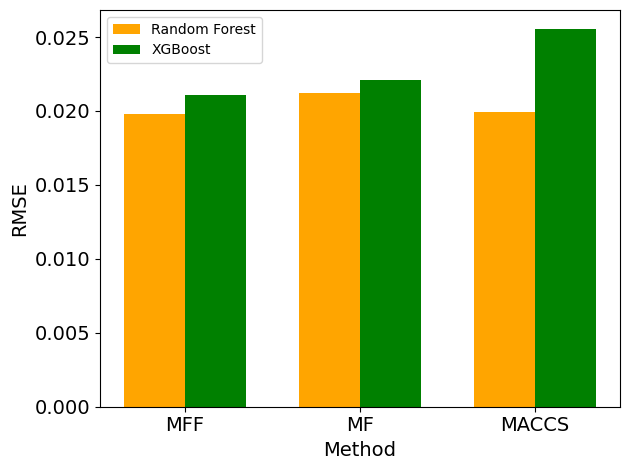

In [ ]:
methods = ['MFF', 'MF', 'MACCS']
rmse_rf = [mff_rf_rmse,mf_rf_rmse,maccs_rf_rmse]  
rmse_xgb = [mff_xgb_rmse,mf_xgb_rmse,maccs_xgb_rmse]  

bar_width = 0.35 
index = np.arange(len(methods))  


fig, ax = plt.subplots()
bar_rf = ax.bar(index, rmse_rf, bar_width, label='Random Forest', color='orange')
bar_xgb = ax.bar(index + bar_width, rmse_xgb, bar_width, label='XGBoost', color='g')


ax.set_xlabel('Method', fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
#ax.set_title('Comparison of MSE between Random Forest and XGBoost')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
ax.legend()


plt.tight_layout()
plt.savefig('rmse_revised_0411.jpg',dpi=400,bbox_inches='tight')